<div class="alert alert-success">
<b>Reviewer's comment V4</b>

The project is accepted. Good luck on the final sprint!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  


<div class="alert alert-warning">
<b>Reviewer's comment</b>

Alright, although as you left no comments at all throughout the project, it's unclear what you didn't understand and what problems you encountered. I added some pointers below, hope that helps :)

</div>

<div align="center" style="border:solid orange 2px; padding: 5px"; class="alert alert-info">   
<span style="color:brown; font-size: 25px"> <b>Introduction for the project <br><br>
<span style="color:brown; font-size: 17px">
<div align="left"> The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.<br>
One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.<br>
Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.<br>
For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.<br>
In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.<br><br>
<div align="center">You should:<br><br>
<div align="left">Learn to predict the probability of churn (for the upcoming month) for each customer<br>
Draw up typical user portraits: select the most outstanding groups and describe their main features<br>
Analyze the factors that impact churn most<br>
Draw basic conclusions and develop recommendations on how to improve customer service:<br>
Identify target groups<br>
Suggest measures to cut churn<br>
Describe any other patterns you see with respect to interaction with customers

In [147]:
#!pip install plotly==5.7.0
#!pip install jupyter-dash

In [148]:
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd 
import math as mth
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# from datetime import timedelta
from dateutil.relativedelta import relativedelta

import plotly
import os

# import sidetable
#import usaddress

from scipy import stats as st

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings("ignore")

In [149]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth',-1)

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Download the data

In [151]:
try:
    df=pd.read_csv('/datasets/gym_churn_us.csv')
except:
    df=pd.read_csv('gym_churn_us.csv')

## Carry out exploratory data analysis (EDA)

In [152]:
df.head(5).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#e1ebe9'), 
            ('color', 'black'),
            ('font-family', 'verdana'),("writing-mode", "vertical-lr")]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#DCDCDC')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background-color', 'yellow')]}

]
).hide_index()

gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1,1,1,1,0,6,1,29,14.227470,5.000000,3,0.020398,0.000000,0
0,1,0,0,1,12,1,31,113.202938,12.000000,7,1.922936,1.910244,0
0,1,1,0,1,1,0,28,129.448479,1.000000,2,1.859098,1.736502,0
0,1,1,1,1,12,1,33,62.669863,12.000000,2,3.205633,3.357215,0
1,1,1,1,1,1,0,26,198.362265,1.000000,3,1.113884,1.120078,0


In [153]:
df=df.reset_index()
df=df.drop(['index'], axis=1)
display(df.info(),df.head(),df.describe(include='all').T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0


,count,mean,std,min,25%,50%,75%,max
gender,4000.000,0.510,0.500,0.000,0.000,1.000,1.000,1.000
Near_Location,4000.000,0.845,0.362,0.000,1.000,1.000,1.000,1.000
Partner,4000.000,0.487,0.500,0.000,0.000,0.000,1.000,1.000
Promo_friends,4000.000,0.308,0.462,0.000,0.000,0.000,1.000,1.000
Phone,4000.000,0.903,0.295,0.000,1.000,1.000,1.000,1.000
Contract_period,4000.000,4.681,4.550,1.000,1.000,1.000,6.000,12.000
Group_visits,4000.000,0.412,0.492,0.000,0.000,0.000,1.000,1.000
Age,4000.000,29.184,3.258,18.000,27.000,29.000,31.000,41.000
Avg_additional_charges_total,4000.000,146.944,96.356,0.148,68.869,136.220,210.950,552.591
Month_to_end_contract,4000.000,4.323,4.191,1.000,1.000,1.000,6.000,12.000


<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright, the data was loaded and inspected!

</div>

In [154]:
df.Month_to_end_contract=df.Month_to_end_contract.astype('int64')

<div class="alert alert-warning">
<b>Reviewer's comment</b>

<s> What are `O_1` and `O_2`?

</div>

### missing features? 

#### Duplicated

In [155]:
len(df.drop_duplicates())

4000

#### Remove Outliers

In [156]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    ls=df.index[(df[ft]<lower_bound)|(df[ft]>upper_bound)]
    
    return ls

In [157]:
index_list=[]
for feature in df.columns[7:13]:
    index_list.extend(outliers(df,feature))

In [158]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [159]:
df_cleaned=remove(df,index_list)

In [160]:
# percentage of the removed outliers
precentage=(1-(len(df_cleaned)/len(df)))*100
print(round(precentage,4),' %')

6.625  %


with outliers


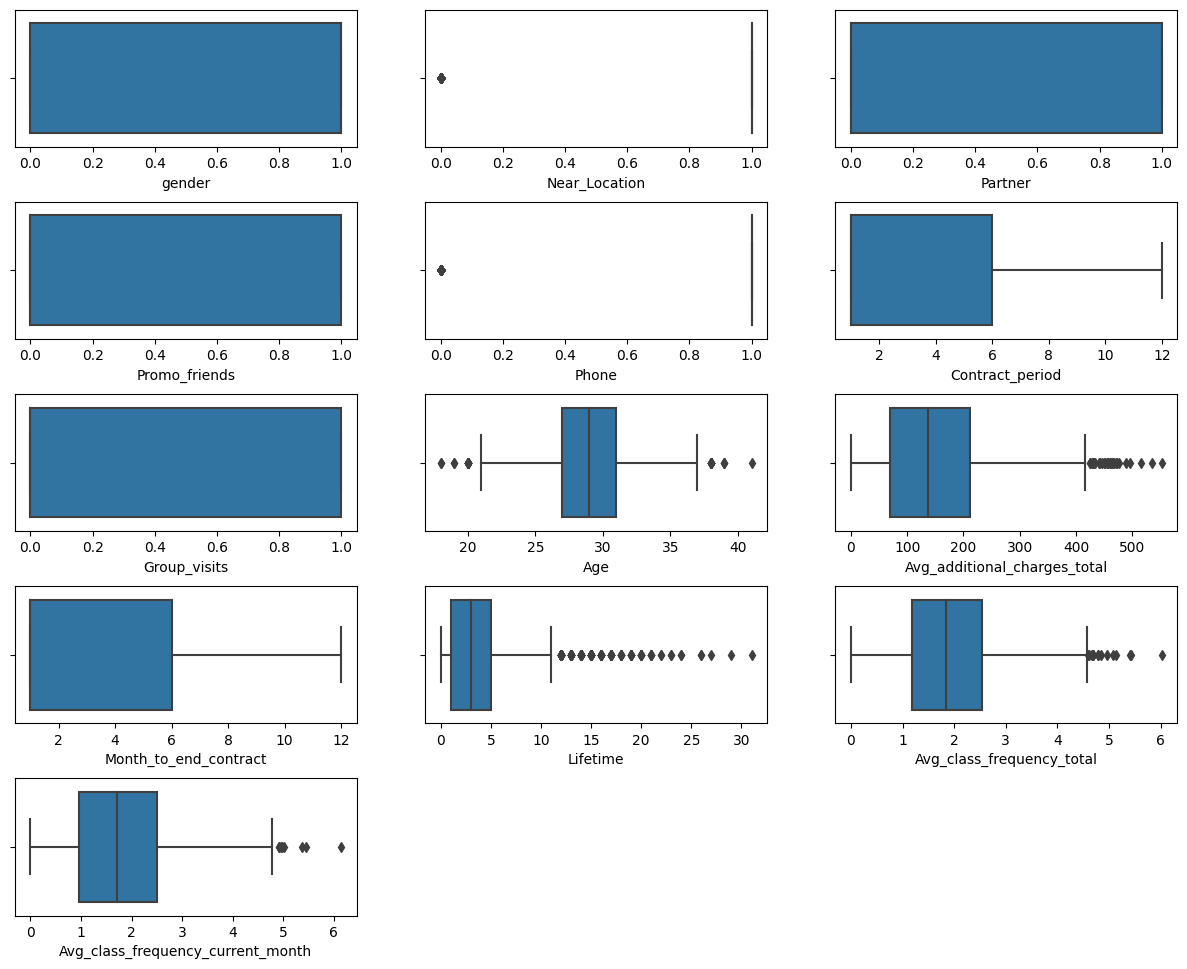

In [161]:
print('with outliers')
r, c = 5, 3 # set number of rows, and columns: since we have 7 features to plot we need a 9X9 canvas
# x and y are the coordinates of each graph on the start of the loop equal to 0
x_i, y_i = 0, 0
fig, axes = plt.subplots(figsize=(15, 12), dpi=100) # create graph and axes objects with size parameters
# iterate over the necessery columns
for col in df_cleaned.columns[:13]:
  ax = plt.subplot2grid((r, c), (x_i, y_i))
  ax = plt.subplots_adjust(hspace=0.4)
  ax = sns.boxplot(df[col])
  # after each iteration when 1 graph is ready, we add to the y_i coordinate to move to the next cell of our canvas
  y_i += 1
  # when the last coordinate equals to the column number we add to the x_i to move to the cell in next row and start columns from the beginning
  if y_i == c: 
    x_i += 1
    y_i = 0

without outliers


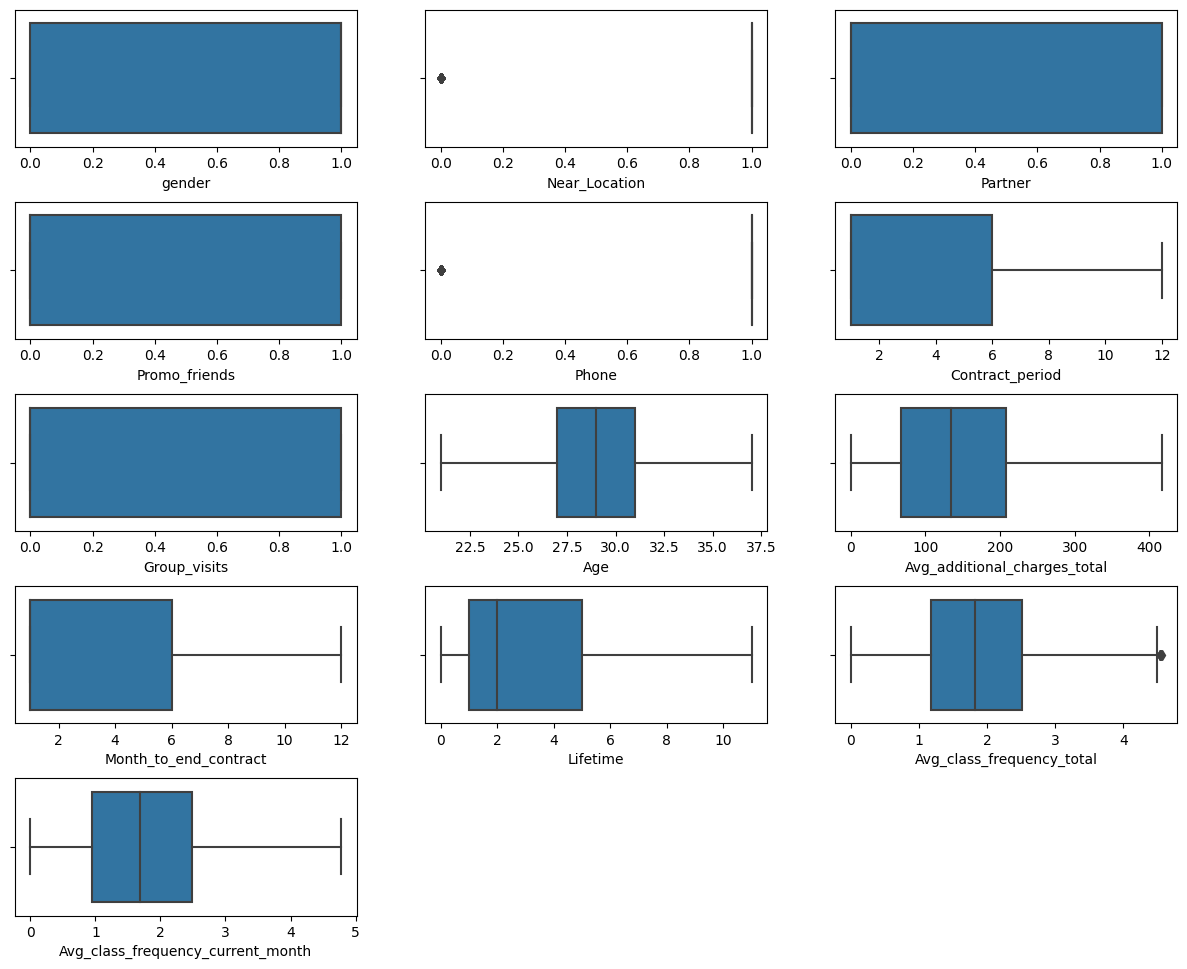

In [162]:
print('without outliers')
r, c = 5, 3 # set number of rows, and columns: since we have 7 features to plot we need a 9X9 canvas
# x and y are the coordinates of each graph on the start of the loop equal to 0
x_i, y_i = 0, 0
fig, axes = plt.subplots(figsize=(15, 12), dpi=100) # create graph and axes objects with size parameters
# iterate over the necessery columns
for col in df_cleaned.columns[:13]:
  ax = plt.subplot2grid((r, c), (x_i, y_i))
  ax = plt.subplots_adjust(hspace=0.4)  
  ax = sns.boxplot(df_cleaned[col])
  # after each iteration when 1 graph is ready, we add to the y_i coordinate to move to the next cell of our canvas
  y_i += 1
  # when the last coordinate equals to the column number we add to the x_i to move to the cell in next row and start columns from the beginning
  if y_i == c: 
    x_i += 1
    y_i = 0

### mean feature values in two groups:

In [163]:
f = {'gender' : 'mean', 'Near_Location': 'mean', 'Partner': 'mean', 'Promo_friends': 'mean', 'Phone': 'mean',
       'Contract_period': 'mean', 'Group_visits': 'mean', 'Age': 'mean',
       'Avg_additional_charges_total': 'mean', 'Month_to_end_contract': 'mean', 'Lifetime': 'mean',
       'Avg_class_frequency_total': 'mean', 'Avg_class_frequency_current_month': 'mean'}
mean_f=df_cleaned.groupby(['Churn'], as_index=False).agg(f)
mean_f

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.508,0.872,0.539,0.357,0.904,5.774,0.462,29.975,155.069,5.314,3.982,2.007,2.010
1,1,0.514,0.769,0.354,0.186,0.903,1.729,0.268,27.075,114.713,1.662,0.987,1.476,1.046


<div class="alert alert-success">
<b>Reviewer's comment</b>

Mean feature values in the two groups were calculated correctly

</div>

### Plot bar histograms 

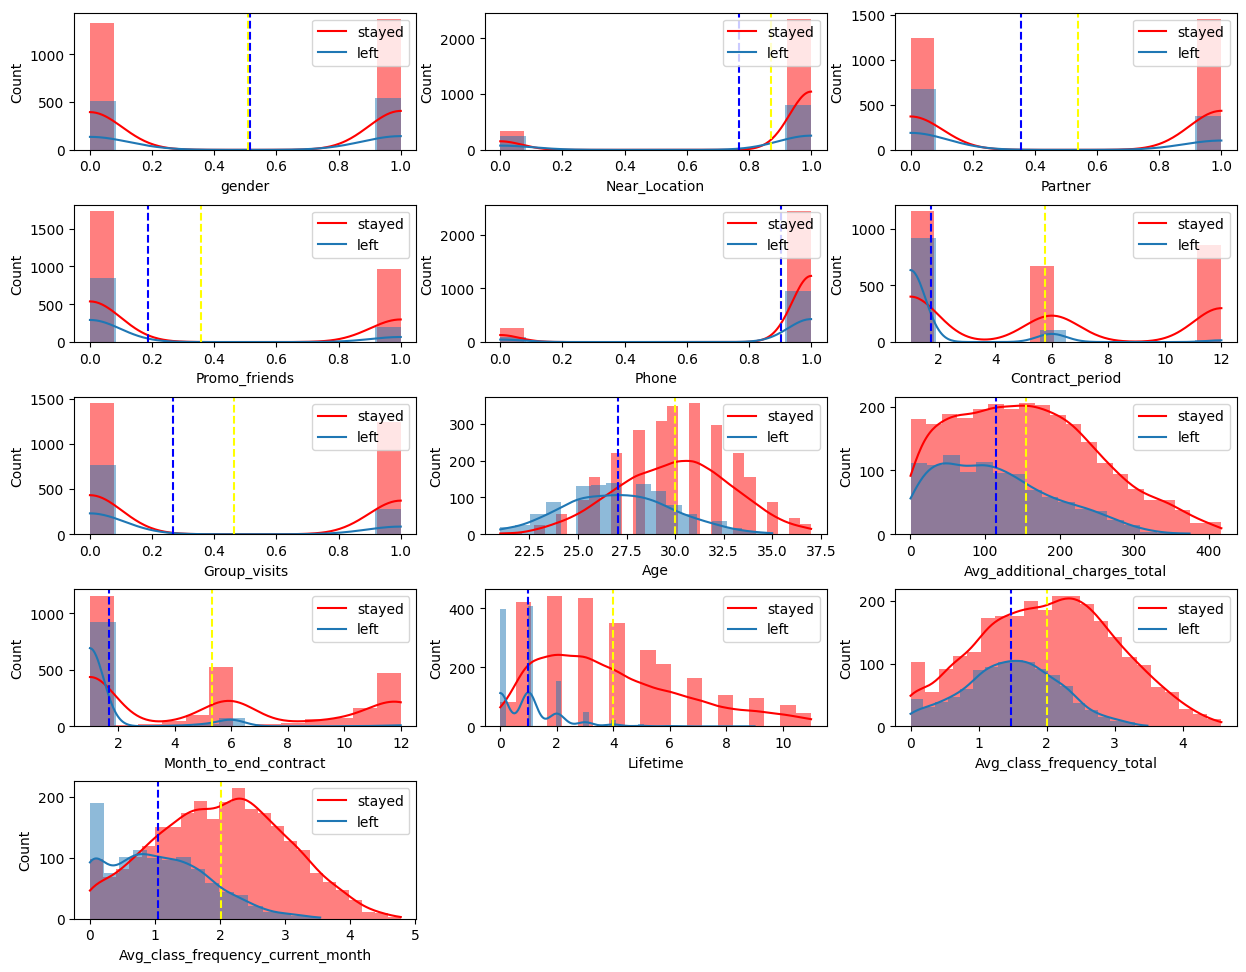

In [164]:
r, c = 5, 3 # set number of rows, and columns: since we have 7 features to plot we need a 9X9 canvas
# x and y are the coordinates of each graph on the start of the loop equal to 0
x_i, y_i = 0, 0
fig, axes = plt.subplots(figsize=(15, 12), dpi=100) # create graph and axes objects with size parameters
# iterate over the necessery columns
for col in df_cleaned.columns[:13]:
  ax = plt.subplot2grid((r, c), (x_i, y_i))
  ax= plt.subplots_adjust(hspace=0.4)
  ax = sns.histplot(df_cleaned[df_cleaned.Churn==0][col], kde=True, stat='count', linewidth=0,color ='red')
  ax = sns.histplot(df_cleaned[df_cleaned.Churn==1][col], kde=True, stat='count', linewidth=0)  
  ax = plt.axvline(df_cleaned[df_cleaned.Churn==0][col].mean(),color ='yellow',linestyle='--') 
  ax = plt.axvline(df_cleaned[df_cleaned.Churn==1][col].mean(),color ='blue',linestyle='--')
  ax = plt.legend(["stayed", "left"], loc ="upper right")   
  # after each iteration when 1 graph is ready, we add to the y_i coordinate to move to the next cell of our canvas
  y_i += 1
  # when the last coordinate equals to the column number we add to the x_i to move to the cell in next row and start columns from the beginning
  if y_i == c: 
    x_i += 1
    y_i = 0
   

<b> - gender:</b> the graph indicates equal measures, so we can ignore it.<b><br>
    - Near_location:</b> it shows that the location of the user's home has a high influence on the the number of the users<b><br>
    - Partner:</b> it also shows that it has to do with it.<b><br>
    - Promo_friends:</b> this feature has not so much influence on the the number of the users<b><br>
    - Phone:</b> the most of the users left their phone number, but it has nothing to do in our case<b><br>
    - Contract_period:</b> it shows that 1 year contract is the most efficient to keep loyal users<b><br>
    - Group_visits:</b> it shows almost the same level, but for loyality it seems that the grouped one is better.<b><br>
    - Age:</b> this feature shows clearly that users in ages between 29-32 are the most number of the total users<b><br>
    - Avg_additional_charges_total:</b> the most of the users spend almost 150$ on other gym services <b><br>
    - Month_to_end_contract:</b> this feature shows that when the user has just 1 month left for the end of the contract he intends to leave. it shows The longer the contract, the more loyal the user<b><br>
    - Lifetime:</b> it has to do with loyality, I think 2 - 4 months is the best choice to keep the users <b><br>
    - Avg_class_frequency_total:</b> it shows that the most users visit the gym 1-3 times weekly <b><br>
    - Avg_class_frequency_current_month:</b> in average 2 times a week for every user in the last month.

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

These are histograms for the complete dataset, but it would be more interesting to look at the histograms for the two groups (those who left and those who stayed). Here's an [example](https://seaborn.pydata.org/tutorial/distributions.html#conditioning-on-other-variables)

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Very good graphs!

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

This is the plots I meant you need to add comments to

</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Excellent!

</div>

###  correlation matrix and display it.

In [165]:
df_cleaned.corr().abs().style.background_gradient(cmap='coolwarm').set_precision(4)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.0000,0.0053,0.0121,0.0121,0.0147,0.0021,0.0180,0.0091,0.0001,0.0005,0.0006,0.0132,0.0066,0.0054
Near_Location,0.0053,1.0000,0.0066,0.2122,0.0133,0.1561,0.1559,0.0506,0.0423,0.1503,0.0669,0.0389,0.0596,0.1263
Partner,0.0121,0.0066,1.0000,0.4569,0.0071,0.3057,0.0179,0.0490,0.0284,0.2928,0.0972,0.0198,0.0427,0.1661
Promo_friends,0.0121,0.2122,0.4569,1.0000,0.0098,0.2466,0.1187,0.0446,0.0434,0.2419,0.1033,0.0200,0.0479,0.1667
Phone,0.0147,0.0133,0.0071,0.0098,1.0000,0.0119,0.0083,0.0067,0.0023,0.0170,0.0129,0.0062,0.0114,0.0011
Contract_period,0.0021,0.1561,0.3057,0.2466,0.0119,1.0000,0.1682,0.1385,0.1185,0.9735,0.2100,0.0942,0.1609,0.4004
Group_visits,0.0180,0.1559,0.0179,0.1187,0.0083,0.1682,1.0000,0.0822,0.0229,0.1621,0.0829,0.0571,0.0771,0.1777
Age,0.0091,0.0506,0.0490,0.0446,0.0067,0.1385,0.0822,1.0000,0.0829,0.1316,0.1997,0.1168,0.1831,0.4105
Avg_additional_charges_total,0.0001,0.0423,0.0284,0.0434,0.0023,0.1185,0.0229,0.0829,1.0000,0.1215,0.0905,0.0406,0.0772,0.1955
Month_to_end_contract,0.0005,0.1503,0.2928,0.2419,0.0170,0.9735,0.1621,0.1316,0.1215,1.0000,0.2022,0.0853,0.1509,0.3918


<b> In both groups there is strong correlation between Contract_period & Month_to_end_contract <br>
    and between Avg_class_frequency_total & Avg_class_frequency_current_month<br> so I'll drop one of the features To get rid of multicollinearity

In [166]:
df_cleaned.drop(['Month_to_end_contract','Avg_class_frequency_current_month'], axis = 1, inplace = True) 

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Ok, so what are your conclusions? How are the two groups different? Are there any interesting correlations?

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

Alright, I can see the conclusions about the correlations, but there are no comments about the plots. How are the two groups (those who left and those who stayed) different?

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

Not quite what I meant. It doesn't make much sense to compare correlations on grouped data

</div>

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Fixed!
    
</div>

## Build a model to predict user churn

###  Divide the data into train and validation sets

In [167]:
# divide the df_cleaned into features (the X matrix) and a target variable (y)
X = df_cleaned.drop('Churn', axis = 1)
y = df_cleaned['Churn']

# divide the df_cleaned into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

# create a StandardScaler object and apply it to the train and test sets
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

<div class="alert alert-danger">
<b>Reviewer's comment</b>

<s>The split above is not actually used. BTW there's no need to make a validation set, if we're not doing any hyperparameter tuning, it's enough to split the data into train and test

</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Ok, the data was split into train and test sets

</div>

###  Train the model on the train set with logistic regression & random forest & evaluate accuracy, precision, and recall for regression

In [168]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [169]:
def print_matrix(y_true, y_pred):
    print('Accuracy: {:.2f}|Precision: {:.2f}|Recall: {:.2f}|F1: {:.2f}'.format(accuracy_score(y_true, y_pred),
                                                                precision_score(y_true, y_pred),
                                                                recall_score(y_true, y_pred),
                                                                f1_score(y_true, y_pred)))

In [170]:
models= [LogisticRegression(random_state= 0), DecisionTreeClassifier(random_state= 0),
         RandomForestClassifier(random_state= 0), GradientBoostingClassifier(random_state= 0)]

for m in models:
    print('-----{}-----'.format(m))
    model=m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print_matrix(y_test, y_pred)

-----LogisticRegression(random_state=0)-----
Accuracy: 0.86|Precision: 0.76|Recall: 0.70|F1: 0.73
-----DecisionTreeClassifier(random_state=0)-----
Accuracy: 0.85|Precision: 0.70|Recall: 0.76|F1: 0.73
-----RandomForestClassifier(random_state=0)-----
Accuracy: 0.89|Precision: 0.82|Recall: 0.74|F1: 0.78
-----GradientBoostingClassifier(random_state=0)-----
Accuracy: 0.89|Precision: 0.84|Recall: 0.75|F1: 0.79


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Ok, so basically the classification report calculates all the needed metrics (accuracy, precision, recall, f1 score), but the output is garbled for some reason. Try wrapping it in a `print()` function

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!

</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Confusion matrix is also a useful tool!

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

For the second model only the accuracy was calculated. Please use the same evaluation (for example, using classification report)

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V2</b>

The classfication report above uses predictions from a different model

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Ok, great!

</div>

###  compare the models. Which model gave better results?

<b> GradientBoostingClassifier gave the best results

## Create user clusters

###  Standardize the data.

In [171]:
from sklearn.cluster import KMeans

# the obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
x_sc = sc.fit_transform(df_cleaned)

km = KMeans(n_clusters = 5,random_state=0) # setting the number of clusters as 5
labels = km.fit_predict(x_sc) # applying the algorithm to the data and forming a cluster vector 
df_cleaned['cluster_km'] = labels

<div class="alert alert-warning">
<s><b>Reviewer's comment</b>

When using KMeans, it's a good idea to set the `random_state` parameter. Otherwise clusters can be slightly different on every run

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Alright!

</div>

###  Use the linkage() function to build a matrix of distances based on the standardized feature matrix

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

I'm not sure what exactly you're confused about. KMeans is an unsupervised learning algorithm, you give it the data, and for each row it returns which cluster it belongs to. Then we can calculate mean feature values and do various visualizations to better understand these clusters. Due to it being unsupervised, we don't need to divide the data into train and test to use it, so it can be applied to the complete dataset. That's pretty much it. If you have any further questions, or if it still doesn't make sense, I suggest asking the tutor for help. Communication through notebook comments is pretty inefficient for these kinds of things.

</div>

In [172]:
from scipy.cluster.hierarchy import dendrogram, linkage 

In [173]:
# obligatory standardization of data before passing it to the algorithm
sc = StandardScaler()
x_sc = sc.fit_transform(df_cleaned)

linked = linkage(x_sc, method = 'ward') 

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

<s>This part can be removed because it duplicates the two lines directly above, and as clustering is unsupervised learning, there's no need to split the data into train and test
    
```python
scaler = StandardScaler()# write your code here
X_train_st = scaler.fit_transform(X_train) # train the scaler and transform the matrix for the train set
```
    
</div>

###  plot a dendrogram.

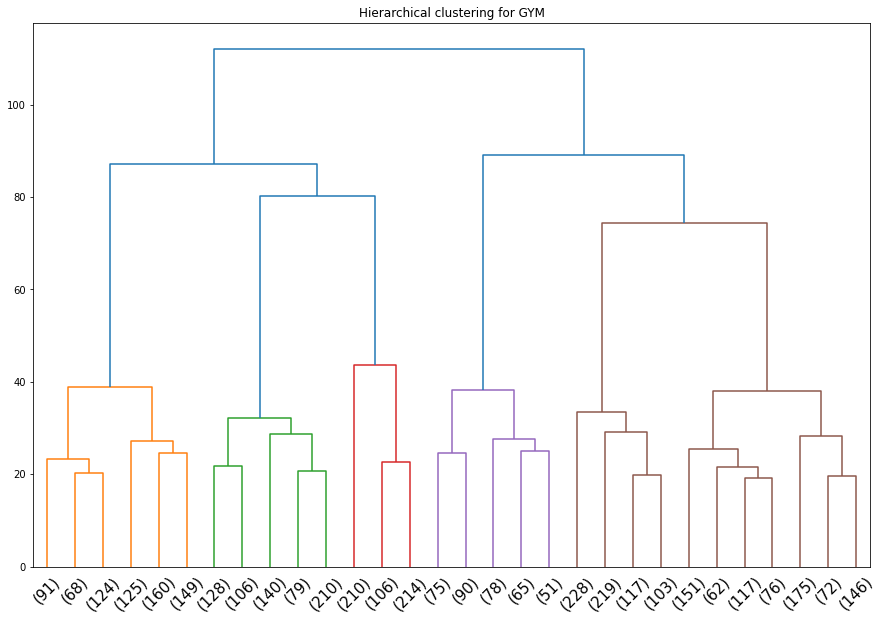

In [174]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top',p=30, truncate_mode='lastp',leaf_rotation=45.,leaf_font_size=15.) 
plt.title('Hierarchical clustering for GYM')
plt.show() 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Alright!

</div>

###  Train the clustering model with the K-means algorithm and predict customer clusters

In [175]:
# the obligatory standardization of data before passing it to the algorithm
km = KMeans(n_clusters = 5,random_state=0) # setting the number of clusters as 5
labels = km.fit_predict(x_sc) # applying the algorithm to the data and forming a cluster vector 
df_cleaned['cluster_km'] = labels

### Look at the mean feature values for clusters. Does anything catch your eye?

In [176]:
clusters=df_cleaned.groupby(
    'cluster_km', as_index=False).mean().sort_values(by=['Avg_additional_charges_total','Lifetime',
                                                                                 'Avg_additional_charges_total'],
                                                                             ascending=False)
clusters

,cluster_km,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
1,1,1.000,0.999,0.299,0.070,0.899,5.024,0.484,30.090,159.055,3.909,2.088,0.001
3,3,0.491,0.991,0.945,1.000,0.902,7.877,0.543,29.884,155.831,4.129,1.971,0.013
4,4,0.000,0.999,0.327,0.055,0.911,5.010,0.440,30.001,153.486,3.944,1.973,0.003
0,0,0.502,0.000,0.490,0.069,0.911,2.898,0.227,28.748,134.660,2.641,1.756,0.418
2,2,0.516,1.000,0.332,0.218,0.899,1.732,0.289,26.999,113.339,0.957,1.480,0.997


<b>I've tried to sort the table to get a picture, and I think this is the order of the 5 clusters when we are talking about the 2 groups together<br><br>
    - I notice that when the features (Contract_period, Group_visits, Avg_additional_charges_total, Lifetime, Avg_class_frequency_total) are heigh the left group is also high

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Ok!

</div>

<div class="alert alert-danger">
<b>Reviewer's comment V2</b>

<s>There's no need to further divide the 5 clusters into those who stayed and those who left, just compare the clusters themselves :)

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Why only these three features?

</div>

### Plot distributions of features for the clusters. Do you notice anything?

In [177]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (15,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], size=df[cluster_name],palette = 'Paired',sizes=(50, 200)
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

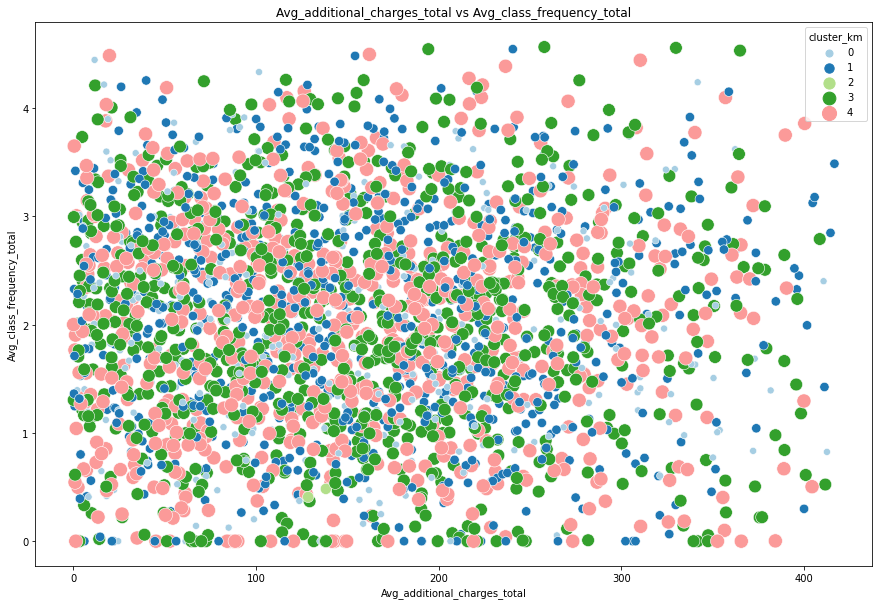

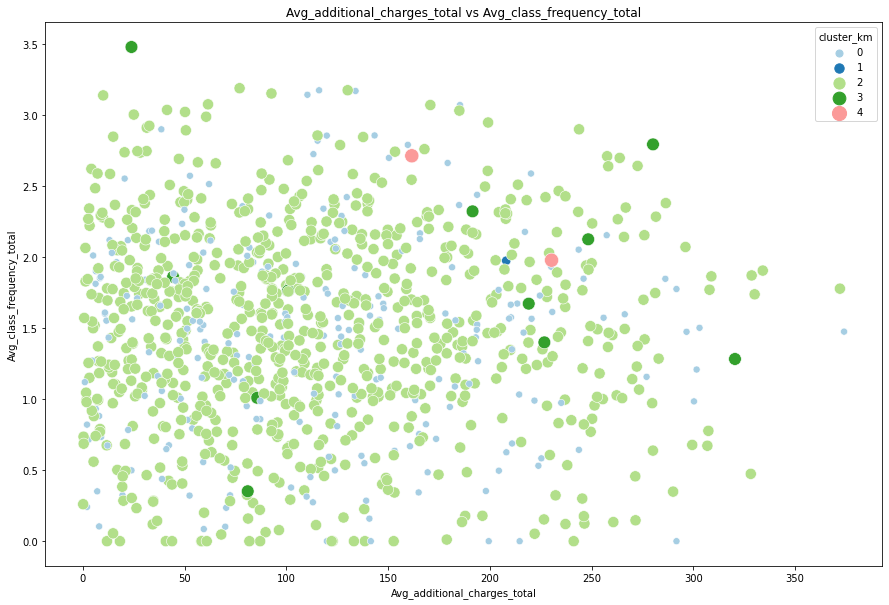

In [178]:
# left
show_clusters_on_plot(df_cleaned[df_cleaned.Churn==0], 'Avg_additional_charges_total',
                      'Avg_class_frequency_total',
                      'cluster_km')
# stayed
show_clusters_on_plot(df_cleaned[df_cleaned.Churn==1], 'Avg_additional_charges_total',
                      'Avg_class_frequency_total',
                      'cluster_km')

<b> i notice that the left group the 5th & 4th & 2nd clusters respectively are the prominant <br>
    and the stayed group is much less than the left one and in it the 3th & 1st clusters are the prominant

<div class="alert alert-danger">
<b>Reviewer's comment</b>

<s>You can use the [example](https://seaborn.pydata.org/tutorial/distributions.html#conditioning-on-other-variables) to plot the distributions of features conditioned on cluster number

</div>

###  Calculate the churn rate for each cluster 

In [179]:
# for stayed group
print('1st cluster',round(len(df_cleaned[(df_cleaned.cluster_km==0) & (df_cleaned.Churn==0)])/len(df_cleaned),3)*100,"%")
print('2nd cluster',round(len(df_cleaned[(df_cleaned.cluster_km==1) & (df_cleaned.Churn==0)])/len(df_cleaned),2)*100,"%")
print('3rd cluster',round(len(df_cleaned[(df_cleaned.cluster_km==2) & (df_cleaned.Churn==0)])/len(df_cleaned),3)*100,"%")
print('4th cluster',round(len(df_cleaned[(df_cleaned.cluster_km==3) & (df_cleaned.Churn==0)])/len(df_cleaned),2)*100,"%")
print('5th cluster',round(len(df_cleaned[(df_cleaned.cluster_km==4) & (df_cleaned.Churn==0)])/len(df_cleaned),3)*100,"%")

1st cluster 9.0 %
2nd cluster 21.0 %
3rd cluster 0.1 %
4th cluster 22.0 %
5th cluster 19.5 %


In [180]:
# for left group
print('1st cluster',round(len(df_cleaned[(df_cleaned.cluster_km==0) & (df_cleaned.Churn==1)])/len(df_cleaned),3)*100,"%")
print('2nd cluster',round(len(df_cleaned[(df_cleaned.cluster_km==1) & (df_cleaned.Churn==1)])/len(df_cleaned),2)*100,"%")
print('3rd cluster',round(len(df_cleaned[(df_cleaned.cluster_km==2) & (df_cleaned.Churn==1)])/len(df_cleaned),3)*100,"%")
print('4th cluster',round(len(df_cleaned[(df_cleaned.cluster_km==3) & (df_cleaned.Churn==1)])/len(df_cleaned),3)*100,"%")
print('5th cluster',round(len(df_cleaned[(df_cleaned.cluster_km==4) & (df_cleaned.Churn==1)])/len(df_cleaned),3)*100,"%")

1st cluster 6.5 %
2nd cluster 0.0 %
3rd cluster 21.2 %
4th cluster 0.3 %
5th cluster 0.1 %


In [181]:
# other method
df_cleaned.groupby('cluster_km')['Churn'].mean() 

cluster_km
0   0.418
1   0.001
2   0.997
3   0.013
4   0.003
Name: Churn, dtype: float64

<div class="alert alert-warning">
<b>Reviewer's comment V3</b>

Ok, not quite what I meant, but this also works. A more efficient way to calculate the churn rate by cluster is as follows:
    
```python
df_cleaned.groupby('cluster_km').Churn.mean() 
```

</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Not sure what you mean, how to calculate the churn rate? Well, that's just the mean value of churn. If you ask about the silhouette score, well, you just pass the data and the cluster labels to it, and it calculates the score. The explanation of what it means is given in the scikit-learn documentation:
    
> The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

> The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

This is not the churn rate

</div>

###  Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

<b>  yes they differ in terms, the 2nd & 4th & 5th clusters are loyal and the other are prone to leave (the 1st & 3rd)

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Please add the conclusions: who are the generic customers in each cluster, how are the clusters different?

</div>

<div class="alert alert-success">
<b>Reviewer's comment V3</b>

Alright!

</div>

##  Come up with conclusions and basic recommendations on working with customers

<div align="center" style="border:solid orange 2px; padding: 5px"; class="alert alert-info">   
<span style="color:brown; font-size: 25px"> <b>GENERAL CONCLUSION <br><br>
<span style="color:brown; font-size: 17px">
<div align="left"> After loading the data of the gym chain Model Fitness I did as follows:<br>
    - I checked if there any missing data, and I didn't find.<br>
    - I checked if there any duplicated data, and I didn't find.<br>
    - I checked the outliers data and cleaned the data from them<br>
    - I calculated the mean values of the two groups of Churn (left & stayed), and noticed that the left group is higher.<br>
    - I plotted histograms for both groups, and obviously the difference was big between them in favor of the left one.<br>
    - The same conclusion I draw as I calculated the correlation matrix.<br>
    - Then I built a model to predict user churn, and I found that the GradientBoostingClassifier model achieved the best results<br>
    - Then I worked on the clusters and I noticed that when the features (Contract_period, Group_visits, Avg_additional_charges_total, Lifetime, Avg_class_frequency_total) is heigh the left group is also high<br>
    - Then I calculated the churn rate for each cluster of the 5 clusters in each group, and revealed which clusters are prone to leaving (the 2nd & 4th & 5th), and which are loyal (the 1st & 3rd)<br><br>
    
<b> - gender:</b> the graph indicates equal measures, so we can ignore it.<b><br>
    - Near_location:</b> it shows that the location of the user's home has a high influence on the the number of the users<b><br>
    - Partner:</b> it also shows that it has to do with it.<b><br>
    - Promo_friends:</b> this feature has not so much influence on the the number of the users<b><br>
    - Phone:</b> the most of the users left their phone number, but it has nothing to do in our case<b><br>
    - Contract_period:</b> it shows that 1 year contract is the most efficient to keep loyal users<b><br>
    - Group_visits:</b> it shows almost the same level, but for loyality it seems that the grouped one is better.<b><br>
    - Age:</b> this feature shows clearly that users in ages between 29-32 are the most number of the total users<b><br>
    - Avg_additional_charges_total:</b> the most of the users spend almost 150$ on other gym services <b><br>
    - Month_to_end_contract:</b> this feature shows that when the user has just 1 month left for the end of the contract he intends to leave. it shows The longer the contract, the more loyal the user<b><br>
    - Lifetime:</b> it has to do with loyality, I think 2 - 4 months is the best choice to keep the users <b><br>
    - Avg_class_frequency_total:</b> it shows that the most users visit the gym 1-3 times weekly <b><br>
    - Avg_class_frequency_current_month:</b> in average 2 times a week for every user in the last month.

<div class="alert alert-success">
<b>Reviewer's comment V4</b>

Ok, great!

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment V3</b>

- Ok, cool. One last thing: it seems that you're interpreting `churn == 1` as those who stayed and `churn == 0` as those who left, but it's actually the other way around: a customer who left is a churned customer, and thus for someone who left `churn == 1`, and for those who stayed `churn == 0`. :)
- Another point is that the task requires you to formulate some basic recommendations. So now that we have some information about the difference between customers who keep using our service and customers who left, what can we do? Do you have any ideas?

</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Don't forget to add the final conclusion with some recommendations 

</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

If you are confused about clustering in general, you should ask the tutor for help. I tried to give a short explanation, but there's not much else I can do through notebook comments.

</div>